In [1]:
from numpy import *
import jupyter as jp
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn.metrics import classification_report
import math

In [12]:
def loss_logitic(X,W,y): #逻辑损失
    m = X.shape[0]
    cnt=0
    tmp = y_train * dot(X_train, W)
    for i in range(m):
        a= tmp[i]
        b=math.pow(math.e,a)
        c=math.log(1+b)
        cnt+=float(c)
    return cnt/n

def Loss_MSE(X,W,y): #平均误差
    m=X.shape[0]
    a=transpose(dot(X,W)-y)
    b=dot(X,W)-y
    return dot(a,b)/(2*m)

def hw(x): #意义同hw（x)
    return 1-1/(1+math.pow(math.e,-x))

def load_train_data(): #加载训练数据
    dataset = ds.load_svmlight_file("dataset\\a9a.txt",n_features=123)
    return dataset[0],dataset[1]

def load_test_data(): #加载测试数据
    dataset = ds.load_svmlight_file("dataset\\a9at.txt",n_features=123)
    return dataset[0], dataset[1]

#C为超参数
#梯度下降
def gradient_descent(X_train,X_val,y_train,y_val,W,alpha,loop_num,C):
    losses_train=[]
    losses_val=[]

    for epoch in range(loop_num):
        cnt_hw_y = zeros(W.shape[0]).reshape(-1,1) #梯度
        tmp = dot(X_train,W)
        for i in range(tmp.shape[0]):
            a=tmp[i]
            b=(a-y_train[i])*X_train[i]
            cnt_hw_y = cnt_hw_y+b.reshape(-1,1)
        cnt_hw_y=cnt_hw_y/tmp.shape[0]
        cnt_hw_y=cnt_hw_y+C*W
        W=W-alpha*cnt_hw_y#更新W

        y_predict_train = where(dot(X_train, W) > 0, 1, -1)
        loss_train = float(Loss_MSE(X_train,W,y_train)) #平均误差
        losses_train.append(loss_train )

        y_predict_val = where( dot(X_val, W) > 0, 1, -1)
        loss_val = float(Loss_MSE(X_val,W,y_val))#平均误差
        losses_val.append(loss_val)

    return W,losses_train,losses_val #返回W和loss



In [13]:
X_train,y_train=load_train_data()
X_test,y_test=load_test_data()

X_train=X_train.toarray()
X_test=X_test.toarray()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

col_train=ones(X_train.shape[0])
col_test=ones(X_test.shape[0])

X_train=c_[col_train,X_train]
X_test=c_[col_test,X_test]

init_W = random.random((X_train.shape[1] , 1))
#init_W=zeros(X_train.shape[1]).reshape(-1,1) #全0初始化

In [14]:
#训练
W,loss_train,loss_test = gradient_descent(X_train,X_test,y_train,y_test,W=init_W,alpha=0.01,loop_num=50,C=0.5)

In [15]:
#打印正类负类
print(classification_report(y_test, where(dot(X_test, W) > 0, 1, -1),target_names=["positive", "negative"],digits=4))

              precision    recall  f1-score   support

    positive     0.7689    0.6945    0.7298     12435
    negative     0.2477    0.3253    0.2812      3846

   micro avg     0.6073    0.6073    0.6073     16281
   macro avg     0.5083    0.5099    0.5055     16281
weighted avg     0.6458    0.6073    0.6239     16281



Text(0.5, 1.0, 'The graph of loss value varing with the number of iterations')

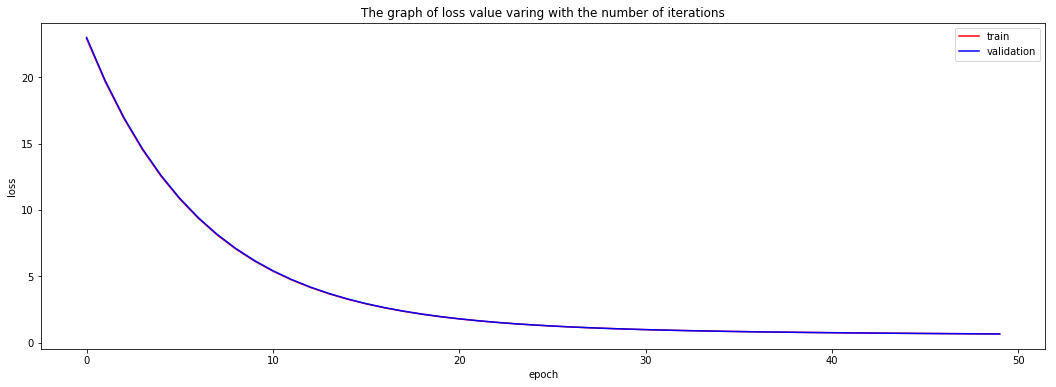

In [16]:
#画loss图
%matplotlib inline

plt.figure(figsize=(18, 6))
plt.plot(loss_train, color="r", label="train")
plt.plot(loss_test, color="b", label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("The graph of loss value varing with the number of iterations")